# Homework 1: Multicollinearity
**A01232580 - Victor Benito Garcia Rocha**

- **Load the modules**

In [1]:
import pandas as pd # Data manipulation
import numpy as np # Numerical operations
import statsmodels.api as sm # Statistical modeling
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf 
import scipy.stats # Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from matplotlib import pyplot as plt # Plotting
import datapro # Custom module for model data processing
#       bp_test(res) - Returns a data frame with the Breusch-Pagan test
#       feasible_gls(data,res) - Feasible Generalized Least Squares
#       plot_fit(res,x,y,reg_line=True) - Plot of a OLS regression
#       robust_se (res) - Returns a df with the coeficients

- **Import the dataset**

In [ ]:
educat = pd.read_excel("Education.xlsx")
educat.head()

,Age,Education,Salary
0,31,7,12.3
1,45,12,45.0
2,47,6,13.2
3,57,5,12.4
4,60,14,28.1


In [ ]:
educat.columns

Index(['Age', 'Education', 'Salary'], dtype='object')

- **Define the dependent and independent variables**

In [ ]:
y_ed = pd.DataFrame(educat.iloc[:,2]) # Dependent variable
X_ed = pd.DataFrame(educat.iloc[:,0:2]) # Independent variables
X_ed = sm.add_constant(X_ed,prepend=True) # Then we add a constant
X_ed.head()

,const,Age,Education
0,1.0,31,7
1,1.0,45,12
2,1.0,47,6
3,1.0,57,5
4,1.0,60,14


- **Fitting the model**

In [ ]:
mod1 = sm.OLS( y_ed,X_ed) # OLS model (Ordinary Least Squares)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     97.57
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           5.99e-24
Time:                        12:51:00   Log-Likelihood:                -405.14
No. Observations:                 100   AIC:                             816.3
Df Residuals:                      97   BIC:                             824.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.5828      5.701     -2.207      0.0

- This shows that the variable Age is not significant.
- Education has a positive and significant effect on Salary.
- The R-squared is 0.668, which means that 66.8% of the variation in Salary is explained by the model.

- **Import the dataset**

In [ ]:
wage = pd.read_excel("wage1.xlsx")
wage.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


- **Define the dependent and independent variables**

In [ ]:
y_wg = pd.DataFrame(wage.iloc[:,0]) # Dependent variable
x_wg = pd.DataFrame(wage.drop(columns="wage")) # Independent variables
x_wg = sm.add_constant(x_wg,prepend=True) # Constant
x_wg.head()

,const,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,1.0,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,1.0,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,1.0,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,1.0,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,1.0,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


- **Fitting the model**

In [ ]:
mod2 = sm.OLS(y_wg,x_wg)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     177.2
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          5.33e-224
Time:                        12:51:07   Log-Likelihood:                -851.68
No. Observations:                 526   AIC:                             1751.
Df Residuals:                     502   BIC:                             1854.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0410      0.422    -11.941      0.0

- The variable "expersq" is not significant (p-value = 0.937).
- The R-squared is 0.890, which means that 89% of the variation in wage is explained by the model.

- **VIF with datapro's function**

In [ ]:
datapro.vif(x_wg, res2, cons=False)

,VIF Factor,Variable
1,1.978847,educ
2,19.703512,exper
3,8.639793,tenure
4,1.063506,nonwhite
5,1.502138,female
6,1.399997,married
7,1.269618,numdep
8,1.194840,smsa
9,1.619502,northcen
10,1.814374,south


- The variable "expersq" has a high VIF (18.42), which indicates **multicollinearity**.

### **Homework**
#### Test the model but eliminating the variable _expersq_

- **Creating a new independent variable**

In [ ]:
x2_wg = pd.DataFrame(x_wg.drop(columns = "expersq")) # Drop the column "expersq"
x2_wg.head()

,const,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,tenursq
0,1.0,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,0,1.131402,0
1,1.0,12,22,2,0,1,1,3,1,0,...,0,0,0,1,0,0,0,1,1.175573,4
2,1.0,11,2,0,0,0,0,2,0,0,...,0,0,1,0,0,0,0,0,1.098612,0
3,1.0,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1.791759,784
4,1.0,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1.667707,4


- **Fitting the model**

In [ ]:
mod3 = sm.OLS(y_wg,x2_wg)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     185.7
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          3.88e-225
Time:                        12:51:13   Log-Likelihood:                -851.68
No. Observations:                 526   AIC:                             1749.
Df Residuals:                     503   BIC:                             1847.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0402      0.422    -11.955      0.0

- The variable "exper" is not significant (p-value = 0.984).
- The R-squared is 0.890, which means that 89% of the variation in wage is explained by the model. It's the same as the previous model.

- **VIF with datapro's function**

In [ ]:
datapro.vif(x2_wg, res3, cons=False)

,VIF Factor,Variable
1,1.964412,educ
2,1.767703,exper
3,8.392302,tenure
4,1.063482,nonwhite
5,1.487168,female
6,1.340496,married
7,1.174728,numdep
8,1.193991,smsa
9,1.619356,northcen
10,1.801311,south


- The VIF values are similar to the previous model, except for "exper" which is now 1.77 (previously 19.70). This indicates that the multicollinearity problem has been solved.

- **Calculate the residuals**

In [ ]:
res3.resid

0      0.237510
1     -0.708455
2      0.322440
3     -1.420380
4     -0.782816
         ...   
521    1.660814
522    0.755844
523   -1.588840
524    0.549524
525   -0.186360
Length: 526, dtype: float64

- **Test for heteroskedasticity**

In [ ]:
datapro.bp_test(res3) # Custom function

,Breusch-Pagan test
Lagrange multiplier LM statistic,54.904920
LM p-value,0.000123
F-value,2.664698
Fp-value,0.000072


This test indicates that there seems to be heteroskedasticity in the model.

- **Feasible Generalized Least Squares**

In [ ]:
datapro.feasible_gls(x2_wg,res3) # Custom function

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            GLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     215.5
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          1.17e-239
Time:                        12:51:21   Log-Likelihood:                -655.24
No. Observations:                 526   AIC:                             1356.
Df Residuals:                     503   BIC:                             1455.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1536      0.265    -11.910      0.0

- **Plotting the fit**

c:\Users\Administrador\Desktop\EconometricModelsITESM\datapro.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=res.params[0]
c:\Users\Administrador\Desktop\EconometricModelsITESM\datapro.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta=res.params[1]


AttributeError: 'DataFrame' object has no attribute 'name'

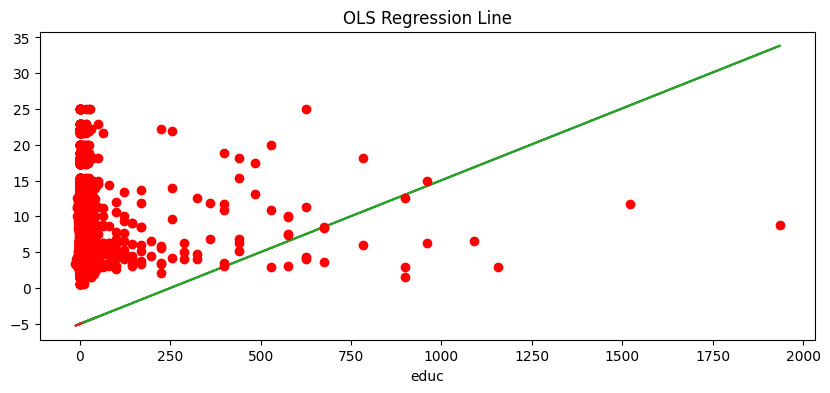

In [ ]:
datapro.plot_fit(res3,x2_wg,y_wg,reg_line=True) # Custom function

- **Calculate the robust standard errors**

In [ ]:
datapro.robust_se(res3) # Custom function

,coef,std err,HC0 std err,HC1 std err
const,-5.040191,0.421605,0.483294,0.494220
educ,0.020083,0.027598,0.027603,0.028227
exper,0.000110,0.005341,0.003677,0.003760
tenure,0.010454,0.021864,0.024246,0.024794
nonwhite,-0.056659,0.185080,0.132231,0.135221
female,0.122951,0.132974,0.123032,0.125814
married,-0.269909,0.129207,0.104280,0.106637
numdep,0.137501,0.046831,0.039571,0.040465
smsa,-0.198108,0.132921,0.112316,0.114855
northcen,-0.184280,0.159881,0.162587,0.166263


The robust standard errors are larger than the standard error (underestimated). This is due to the presence of heteroskedasticity in the model.